In [19]:
# import the necessary packages
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imutils import paths
from google.colab.patches import cv2_imshow
import numpy as np
import argparse

!pip install mahotas
import mahotas
import cv2

In [20]:
def describe(image):
	# extract the mean and standard deviation from each channel of the image
	# in the HSV color space
	(means, stds) = cv2.meanStdDev(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))
	colorStats = np.concatenate([means, stds]).flatten()

	# extract Haralick texture features
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	haralick = mahotas.features.haralick(gray).mean(axis=0)

	# return a concatenated feature vector of color statistics and Haralick
	# texture features
	return np.hstack([colorStats, haralick])

In [21]:
# prompt: How to load image dataset into google colab

# get the paths to the images
imagePaths = list(paths.list_images('/content/4scenes'))

# load the images and extract the features
data = []
labels = []

for imagePath in imagePaths:
  # load the image
  image = cv2.imread(imagePath)

  # extract the features
  features = describe(image)

  # get the label from the path
  label = imagePath[imagePath.rfind("/") + 1:].split("_")[0]

  # add the features and label to the data
  data.append(features)
  labels.append(label)

# convert the data to a NumPy array
data = np.array(data)
labels = np.array(labels)

# split the data into training and testing sets
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)



In [22]:
# initialize the model as a decision tree
model = DecisionTreeClassifier(random_state=84)

#model = RandomForestClassifier(n_estimators=20, random_state=42)

In [23]:
# train the decision tree
print("[INFO] training model...")
model.fit(trainX, trainY)

[INFO] training model...


DecisionTreeClassifier(random_state=84)

In [24]:
# evaluate the classifier
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(classification_report(testY, predictions))

[INFO] evaluating...
              precision    recall  f1-score   support

       coast       0.71      0.74      0.73        88
      forest       0.96      0.88      0.92        88
     highway       0.73      0.74      0.73        69
      street       0.72      0.77      0.75        65

    accuracy                           0.78       310
   macro avg       0.78      0.78      0.78       310
weighted avg       0.79      0.78      0.79       310



[PREDICTION] street_par3.jpg: street


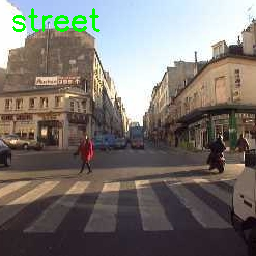

[PREDICTION] highway_urb743.jpg: highway


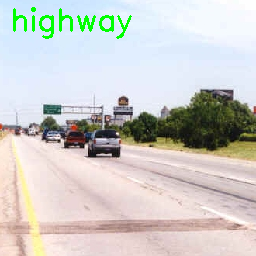

[PREDICTION] street_gre295.jpg: street


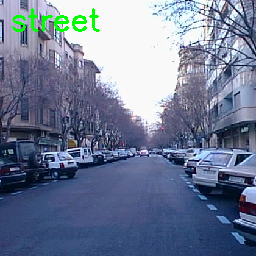

[PREDICTION] coast_natu469.jpg: coast


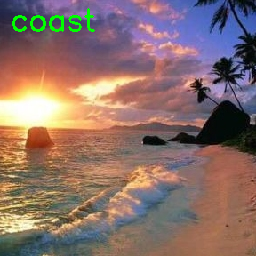

[PREDICTION] coast_cdmc951.jpg: coast


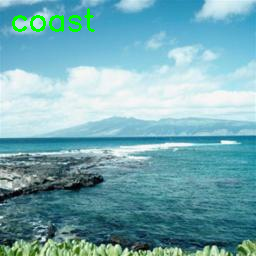

[PREDICTION] coast_nat956.jpg: street


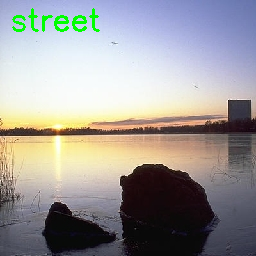

[PREDICTION] forest_for20.jpg: forest


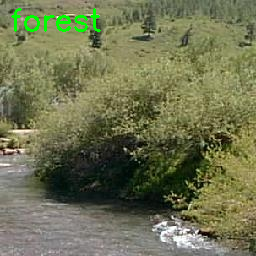

[PREDICTION] highway_bost290.jpg: highway


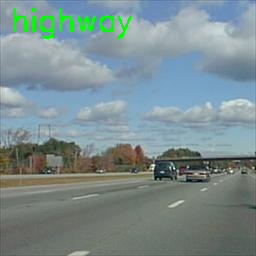

[PREDICTION] highway_bost165.jpg: highway


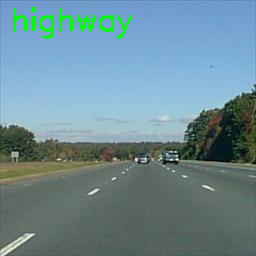

[PREDICTION] highway_gre410.jpg: highway


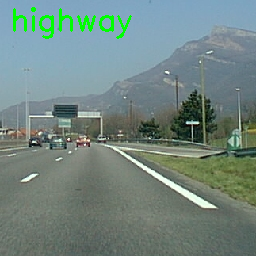

In [25]:
# loop over a few random images
for i in np.random.randint(0, high=len(imagePaths), size=(10,)):
	# grab the image and classify it
	imagePath = imagePaths[i]
	filename = imagePath[imagePath.rfind("/") + 1:]
	image = cv2.imread(imagePath)
	features = describe(image)
	prediction = model.predict(features.reshape(1, -1))[0]

	# show the prediction
	print("[PREDICTION] {}: {}".format(filename, prediction))
	cv2.putText(image, prediction, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2)
	cv2_imshow(image)
	cv2.waitKey(0)